In [1]:
from paddleocr import PaddleOCR
import os

ocr = PaddleOCR(
    lang="en",
    text_detection_model_name="PP-OCRv5_server_det",
    text_recognition_model_name="PP-OCRv5_server_rec",
    use_doc_orientation_classify=False,
    use_doc_unwarping=True,
    use_textline_orientation=True,
)

input_folder = "./demo_photos"
output_folder = "./output_OCRv5"
os.makedirs(output_folder, exist_ok=True)

# Process all image files in input_folder
for fname in os.listdir(input_folder):
    fpath = os.path.join(input_folder, fname)
    if not os.path.isfile(fpath):
        continue
    # Optional: filter for image extensions
    if not fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        continue

    result = ocr.predict(fpath)
    for res in result:
        res.print()
        # Save results with unique names per image
        res.save_to_img(os.path.join(output_folder, f"{os.path.splitext(fname)[0]}_res"))
        res.save_to_json(os.path.join(output_folder, f"{os.path.splitext(fname)[0]}_res"))

c:\Users\ljsjo\OneDrive\Desktop\llm_learning\ocr_system\ocr_paddle\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ljsjo\AppData\Local\Temp\ipykernel_27220\1810206183.py:4: UserWarning: `lang` and `ocr_version` will be ignored when model names or model directories are not `None`.
  ocr = PaddleOCR(
c:\Users\ljsjo\OneDrive\Desktop\llm_learning\ocr_system\ocr_paddle\Lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\ljsjo\

C:\Users\ljsjo\AppData\Local\Temp\ipykernel_27220\3030634212.py:57: UserWarning: Glyph 12391 (\N{HIRAGANA LETTER DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ljsjo\AppData\Local\Temp\ipykernel_27220\3030634212.py:57: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ljsjo\AppData\Local\Temp\ipykernel_27220\3030634212.py:57: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ljsjo\AppData\Local\Temp\ipykernel_27220\3030634212.py:61: UserWarning: Glyph 12391 (\N{HIRAGANA LETTER DE}) missing from font(s) DejaVu Sans.
  plt.savefig(pdf_path)
C:\Users\ljsjo\AppData\Local\Temp\ipykernel_27220\3030634212.py:61: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.savefig(pdf_path)
C:\Users\ljsjo\AppData\Local\Temp\ipykernel_27220\3030634212.py:61: UserWarning: Glyph 23567 (\N{CJK UN

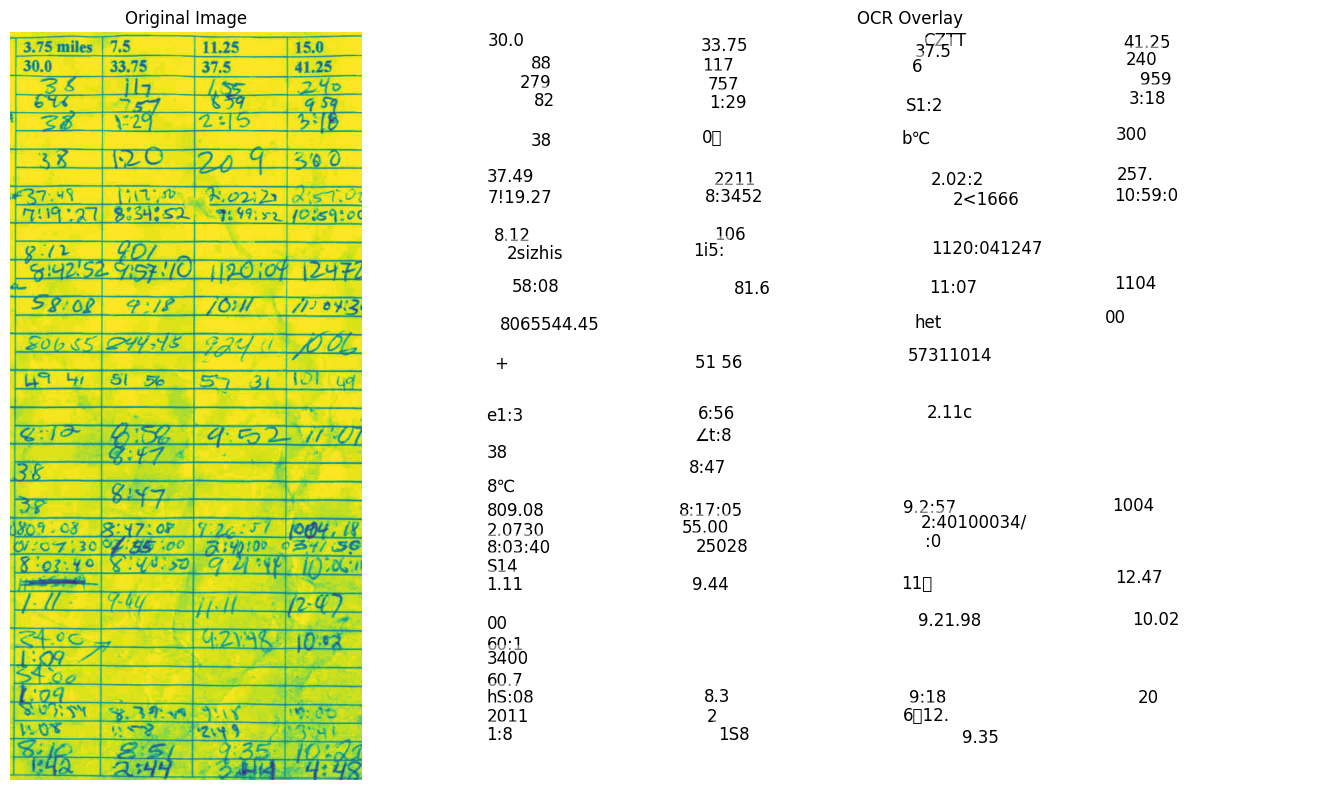

C:\Users\ljsjo\AppData\Local\Temp\ipykernel_27220\3030634212.py:57: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ljsjo\AppData\Local\Temp\ipykernel_27220\3030634212.py:61: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from font(s) DejaVu Sans.
  plt.savefig(pdf_path)
C:\Users\ljsjo\AppData\Local\Temp\ipykernel_27220\3030634212.py:61: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from font(s) DejaVu Sans.
  plt.savefig(pdf_path)
c:\Users\ljsjo\OneDrive\Desktop\llm_learning\ocr_system\ocr_paddle\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


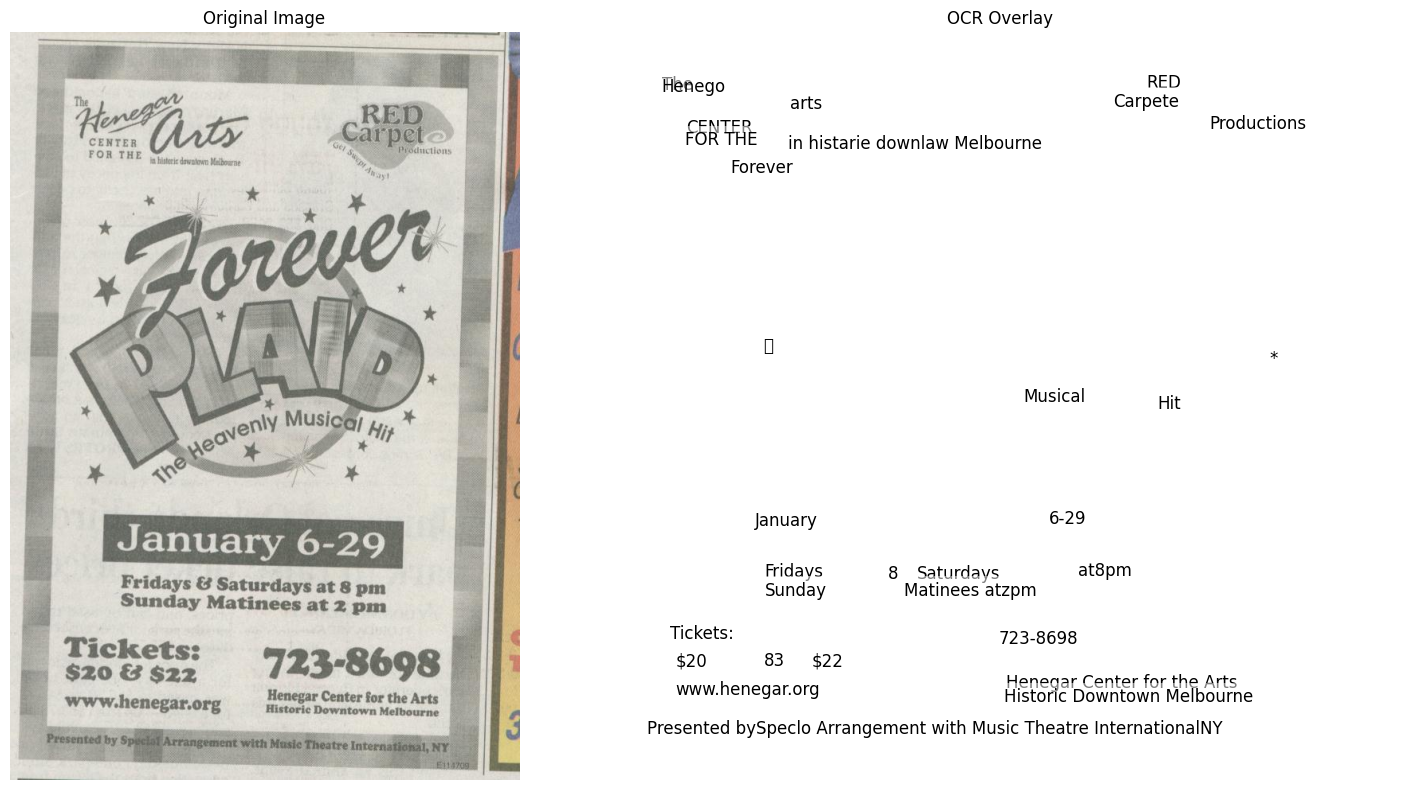

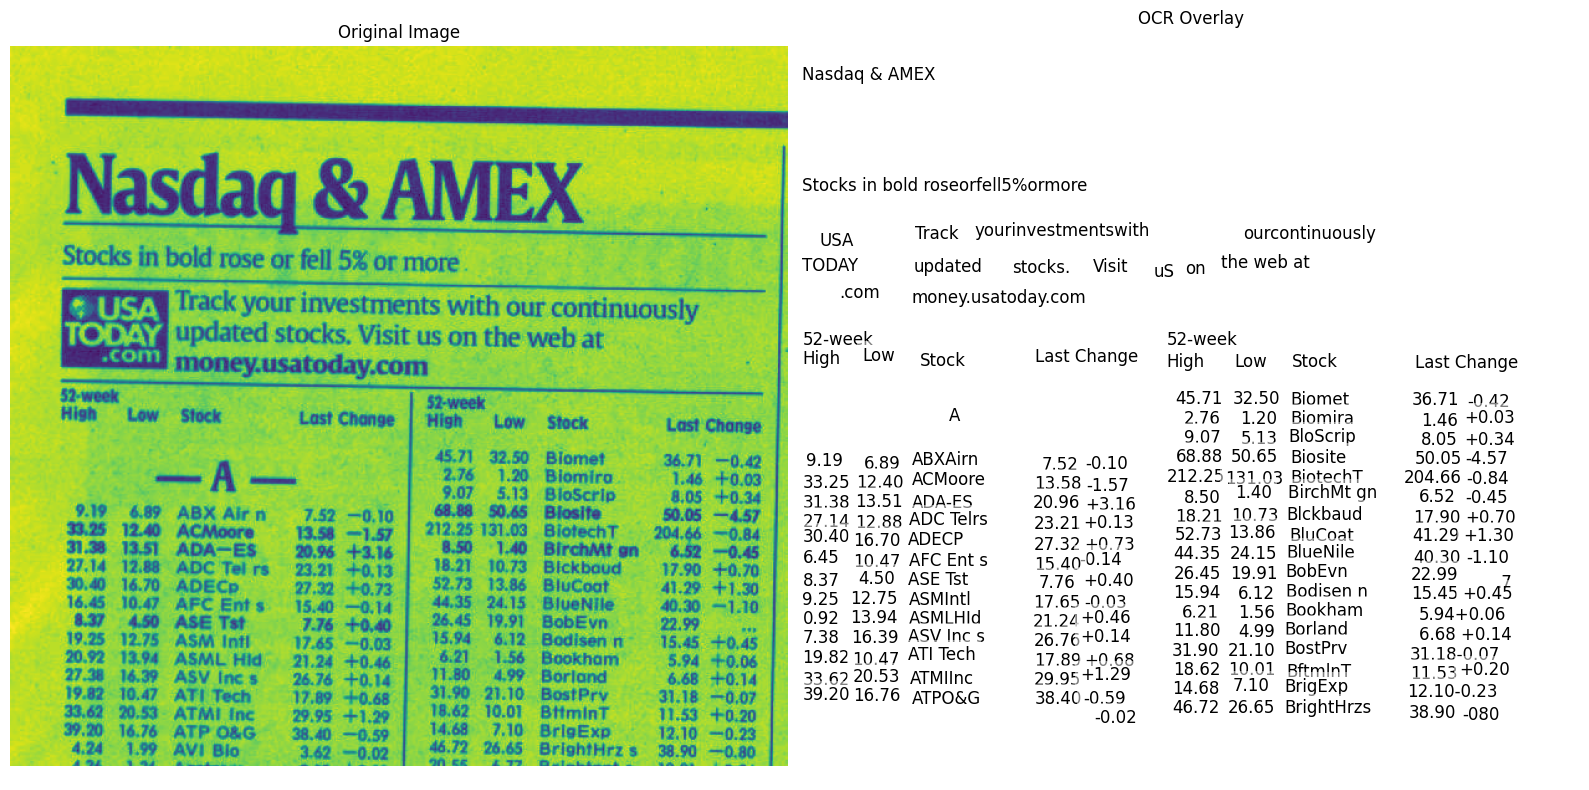

In [2]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Walk through all JSON result files inside output_folder
for root, _, files in os.walk(output_folder):
    for file in files:
        if file.endswith("_res.json"):
            json_path = os.path.join(root, file)
            base_name = os.path.splitext(file)[0]  # e.g. "invoice_res"

            # Original file name (remove "_res")
            orig_name = base_name.replace("_res", "")

            # Try to locate original image in ../demo_photos with common extensions
            orig_img_path = None
            for ext in [".png", ".jpg", ".jpeg", ".bmp", ".tiff"]:
                candidate = os.path.join(input_folder, orig_name + ext)
                if os.path.exists(candidate):
                    orig_img_path = candidate
                    break

            # Load OCR result
            with open(json_path, encoding="utf-8") as f:
                data = json.load(f)

            texts = data["rec_texts"]
            boxes = data["rec_boxes"]

            # Create overlay figure
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

            # --- Left: Original Image ---
            if orig_img_path:
                img = mpimg.imread(orig_img_path)
                ax1.imshow(img)
                ax1.set_title("Original Image")
                ax1.axis("off")
            else:
                ax1.text(0.5, 0.5, "Original image not found", ha="center", va="center")
                ax1.axis("off")

            # --- Right: OCR Overlay ---
            for text, box in zip(texts, boxes):
                x1, y1, x2, y2 = box
                ax2.text(
                    x1, y1, text, fontsize=12, va="top", ha="left",
                    bbox=dict(facecolor="white", alpha=0.5, edgecolor="none")
                )
            ax2.set_xlim(0, max(b[2] for b in boxes) + 50)
            ax2.set_ylim(max(b[3] for b in boxes) + 50, 0)
            ax2.set_title("OCR Overlay")
            ax2.axis("off")

            plt.tight_layout()

            # Save PDF alongside JSON and JPG
            pdf_path = os.path.join(root, f"{base_name}.pdf")
            plt.savefig(pdf_path)

            # Show both plots
            plt.show()
            plt.close()
